# ADS Midterm 2018

In [25]:
# this is me
__author__ = "Sung Hoon Yang, CUSP NYU 2018"

# limit the number of same warnings to once
import warnings
warnings.filterwarnings(action='once')

# Built-ins
import os
import sys
import math

# Basic
import numpy as np
import pandas as pd
import matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(999)
%matplotlib inline

# Processing 
from sklearn.preprocessing import MinMaxScaler

# Stat
from scipy import stats
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
from statsmodels.regression.linear_model import WLS
from statsmodels.tools.tools import add_constant

# Regularization using Ridge, Lasso
from sklearn import linear_model

# PCA module
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

# Time Series AutoRegression
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR

# Clustering
from scipy.spatial.distance import cdist, pdist # used by k-means elbow method
from sklearn.cluster import KMeans
sys.path.insert(0, '/nfshome/shy256/fall18/appliedDataScience/hw5')
from elbow import elbow # Copied from Session 9 Notebook, and stored in above path under name elbow.py
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# SVM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

# Misc. Utilities
import re
from datetime import datetime
from copy import deepcopy


## Theoretic part

### Question 1. 
Imagine traninig a model which considers multiple sattelite images of urban traffic and tries to find groups of images which represent same locations. How would you classify this problem from Machine Learning perspective:

A. Supervised leanring;

B. Unsupervised learning;

C. Semi-supervised learning;

D. Reinforcement learning.

Explain your choice:


**Answer:** **B. Unsupervized training** is the answer. This is because we do not label the locations that would work as *supervision* in the case of Supervised Learning. The unlabeled satellite images will be converted into data points with n x m image information (e.g. if the images are of same size of nxm pixel). We can then run unsupervised clustering algorithms such as DBSCAN or Kmeans Clustering to cluster them.  

### Question 2. 
Which of the following statements (select all that apply) are true about overfitting problem for linear regression:

A. Overfitting problem could happen if we do not have enough features but a big
number of observations.

B. Overfitting problem could happen when we have many noisy features but a
small number of observations.

C. Overfitting problem could be detected by R-squared if the in-sample R-squared
is very low.

D. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is very low.

E. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is considerably lower compared to in-sample R-squared.

Explain how do you understand the concept of overfitting in general and in the context of your answer.

**Answer:** B and E. Overfitting happens when the size of training data and the model complexity (e.g. number of features) are out of balance. When a model is too complex it can learn not only the major patterns, but also a number of occasional features being specific to the training set, which are not generalizeable, this way resulting in a strong in-sample performance and weak out-of-sample, i.e. OS R2 being much lower than IS R2.

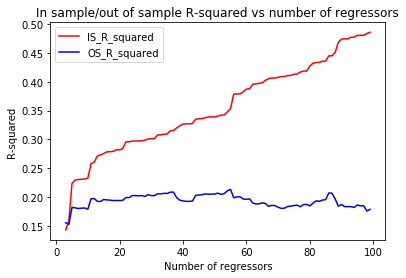

In [39]:
#In the sample test
OLS_R_2_IS=[] # make a list to store our in the sample R_squared
OLS_R_2_OS=[] #make a list to store our out the sample R_squared
var_list=base_columns+list_311

# A loop to run OLS while adding 311 regressors one by one
nvariables=range(3,100)#len(var_list)+1)
for j in nvariables: 
    model=sm.OLS(REsample1.sale_price,sm.add_constant(REsample1[var_list[:j]]),missing="drop").fit()
    OLS_R_2_IS.append(model.rsquared)
    #Out of the sample test
    Ypred2=model.predict(sm.add_constant(REsample2[var_list[:j]]))
    R_OS=1-((np.asarray(Ypred2)-REsample2.sale_price)**2).sum()/((REsample2.sale_price-np.mean(REsample2.sale_price))**2).sum()
    if R_OS<0: #cut negative values
        R_OS=0
    OLS_R_2_OS.append(R_OS)
    
#visualize 
plt.title('In sample/out of sample R-squared vs number of regressors')
plt.plot(nvariables,OLS_R_2_IS,'r',label='IS_R_squared')
plt.plot(nvariables,OLS_R_2_OS,'b',label='OS_R_squared')
plt.legend(loc='upper left')
plt.xlabel('Number of regressors')
plt.ylabel('R-squared')
plt.draw()

The source code executes the following tasks:
1. the data frame has 100 variables that are potential regressors. We loop through them, increasing the number of employed regressor by one with each iteration. We repeat step 2 and 3 in each iteration.
2. Repeated in each iteration: We produce Ordinary Least Square regression  model with the in-sample(IS) data, and get the computed R-squared from the model object.
3. Repeated in each iteration: Using the model, we make predictions against out of sample(OS) data that form values for $\hat{y}$. Using this, we calculate the $R^2$. 
4. The IS and OS $R^2$ are plotted as above.

Using the plot, we can determine the optimal number of regressors. In this case, OS $R^2$ does not improved after 35 regressors, while IS counterpart continues increase toward 1. This is the case when we can diagnose overfitting.

## Question 3.

Assume you found that the output variable $y$ has a correlation of $40\%$ with the input variable $x_1$ and a negative correlation of $-30\%$ with the input variable $x_2$. Select all of the following statements (all that apply) which could be proven to be true:

A. Regression $y\sim a_1 x_1$ will have positive $a_1$;

B. Regression $y\sim a_1 x_1+a_2 x_2+a_0$ will have positive $a_1$ and negative $a_2$;

C. Regression $y\sim a_2 x_2$ will have $a_2=-0.3$;

D. Regression $y\sim a_2 x_2$ will have $a_2=-0.3$ if $x_2$ and $y$ were standardized;

E. Regression $y\sim a_1 x_1+a_2 x_2+a_0$ will have $a_1=0.4$ and $a_2=-0.3$ if $y,x_1,x_2$ were standardized.

F. Regression $y\sim a_1 x_1+a_2 x_2$ will have $a_0=0$, $a_1=0.4$ and $a_2=-0.3$ if $y,x_1,x_2$ were standardized and $x_1$ and $x_2$ were obtained as the two leading principal components from a set of other features.

**Hint:** recall one of the main properties of the principal components.

**Answer:** A) (While $a_1$ does not have to be the same as correlation coefficient unless $x$ and $y$ are standardized it has to be of the same sign), D) ($a_2$ equals to $corr(x_2,y)$ if $x_2,y$ are standardized), F) ($a_1,a_2$ are equal to the corresponding correlation coefficients when $y,x_1,x_2$ are standardized and $x_1,x_2$ are uncorrelated, which is the case for principal components)

## Question 4.

Regression $y\sim a_1 x_1 + a_2 x_2 +a_3 x_3$ have p-value of $0.04$ for $x_1$, $0.1$ for $x_2$ and $0.2$ for $x_3$. Does it mean that (select all that apply):

A. Impact of $x_3$ is twice stronger than impact of $x_2$.

B. Regressors $x_2$ and $x_3$ are irrelevant.

C. One could reject the null-hypothesis $a_j=0$ only for $j=1$ but not for $j=2$ and $j=3$ at 95% singificance level.

D. The estimated value of $a_1$ is statistically significant.

E. 95%-confidence indervals for $a_2$ and $a_3$ should contain zero. 

**Answer:** C,E. Note that $p-$values only concern rejecting the null hypothesis, they do not prove relevance, irrelevance, impact strength or true values. Also is p-value is higher than $\alpha$ then $1-\alpha$-confidence interval contains zero.

## Practice part
## Case I. Crime statistics

Crime Rate in 47 states of the USA with 13 explanatory variables  
The crime rate (**Y**) in 47 states in the U.S. was reported together with possible factors that might influence it. The factors recorded are as follows;  
X1 = the number of males aged 14 - 24 per 1000 of total state population  
X2 = binary variable distinguishing southern states (X2 =1) from the rest (X2=0).  
X3 = the mean number of years of schooling x 10 of the population, 25 years old and over  
X4 = police expenditure (in dollars) per person by state and local government in 1960  
X5 = police expenditure (in dollars) per person by state and local government in 1959  
X6 = labour force participation rate per 1000 civilian urban males in the age group 14-24  
X7 = the number of males per 1000 females  
X8 = state population size in hundred thousands  
X9 = unemployment rate of urban males per 1000 in the age group 14-24    
X10 = unemployment rate of urban males per 1000 in the age group 35-59.  
X11 = the median value of family income or transferable goods and assets (unit 10 dollars)  
X12 = the number of families per 1000 earning below one-half of the median income.  

In [35]:
# Libraries which might be required
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

Populating the interactive namespace from numpy and matplotlib


/nfshome/shy256/.conda/envs/tf/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
data = pd.read_excel('DATA/Crime.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,151,1,91,58,56,510,950,33,108,41,394,261,79.1
1,143,0,113,103,95,583,1012,13,96,36,557,194,163.5
2,142,1,89,45,44,533,969,18,94,33,318,250,57.8
3,136,0,121,149,141,577,994,157,102,39,673,167,196.9
4,141,0,121,109,101,591,985,18,91,20,578,174,123.4


In [37]:
__INIT_Q1_DATA__ = deepcopy(data)

In [38]:
# run when data is corrupt
data = deepcopy(__INIT_Q1_DATA__)

### Q1. Report the correlation coefficients between each feature and the output variable Y (crimes per 100)
Please use a loop

In [39]:
cols = [c for c in data.columns if c.startswith('X')] # all explanatory variables
cols
print(
    'Below are pairwise Pearson\'s correlation coefficient,\n' + 
    'where the left label is the explanatory variable\'s column name:\n'
 )
for X in cols:
    print(X, ':\t', np.corrcoef(data[X],data['Y'])[0][1]) # get correlation versus Y

Below are pairwise Pearson's correlation coefficient,
where the left label is the explanatory variable's column name:

X1 :	 -0.08947240075369889
X2 :	 -0.09063695895188584
X3 :	 0.3228348695297078
X4 :	 0.6876044557069301
X5 :	 0.6667141422009378
X6 :	 0.18886634750263542
X7 :	 0.21391426058863547
X8 :	 0.3374740613062722
X9 :	 -0.05047791806389119
X10 :	 0.17732064770605124
X11 :	 0.4413199489734458
X12 :	 -0.1790237306415988


### Q2. Look at the impact of each feature separately (on all 47 observations)
    Fit bi-variate regressions and report the estimate as well as the p-values. Please use a loop

In [40]:
for X in cols:
    fit = smf.ols(formula='Y~%s' % X, data=data).fit()
    print(X)
    print('\tIntercept (p-value: %.4f): ' % fit.pvalues[0], fit.params[0])    
    print('\tCoefficient (p-value: %.4f): ' % fit.pvalues[1], fit.params[1])    


X1
	Intercept (p-value: 0.0489):  128.66455730676643
	Coefficient (p-value: 0.5498):  -0.2753468744692191
X2
	Intercept (p-value: 0.0000):  92.99999999999996
	Coefficient (p-value: 0.5446):  -7.318749999999982
X3
	Intercept (p-value: 0.5996):  -27.39665449492189
	Coefficient (p-value: 0.0269):  1.116121402066733
X4
	Intercept (p-value: 0.2602):  14.446398301978107
	Coefficient (p-value: 0.0000):  0.8948483804272909
X5
	Intercept (p-value: 0.2119):  16.51642414963246
	Coefficient (p-value: 0.0000):  0.9222031463715922
X6
	Intercept (p-value: 0.8903):  -10.929773133182039
	Coefficient (p-value: 0.2036):  0.1807552069024703
X7
	Intercept (p-value: 0.3290):  -185.48948437133777
	Coefficient (p-value: 0.1488):  0.2807650267402466
X8
	Intercept (p-value: 0.0000):  77.9548159709679
	Coefficient (p-value: 0.0204):  0.3428376812112194
X9
	Intercept (p-value: 0.0022):  100.84654148819605
	Coefficient (p-value: 0.7362):  -0.10828782035774803
X10
	Intercept (p-value: 0.0103):  62.916194570898675
	

### Q3. Take for the further consideration only those which regressors have correlation coefficient with Y above 30%. Fit the multi-variate regression with them, report statistics

In [41]:
cols = [c for c in data.columns if c.startswith('X')] # all explanatory variables
cols
print(
    'Below are pairwise Pearson\'s correlation coefficient,\n' + 
    'where the left label is the explanatory variable\'s column name:\n'
 )
for X in cols:
    corr = np.corrcoef(data[X],data['Y'])[0][1]
    if corr > 0.3:
        print(X, ':\t', corr) # get correlation versus Y

Below are pairwise Pearson's correlation coefficient,
where the left label is the explanatory variable's column name:

X3 :	 0.3228348695297078
X4 :	 0.6876044557069301
X5 :	 0.6667141422009378
X8 :	 0.3374740613062722
X11 :	 0.4413199489734458


In [42]:
cols_of_inst = ['X3', 'X4', 'X5', 'X8', 'X11']

### Q4. Visualize the model fit (true values as X against the predicted values as Y together with the equality line)

In [43]:
fit = smf.ols(formula='Y~%s' % '+'.join(cols_of_inst), data=data).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     9.411
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           4.96e-06
Time:                        22:24:35   Log-Likelihood:                -220.02
No. Observations:                  47   AIC:                             452.0
Df Residuals:                      41   BIC:                             463.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9177     42.504      0.092      0.9

In [44]:
data['q1_multivar_reg_ypred'] = fit.predict(data[cols_of_inst])

In [45]:
_data = data.sort_values(by='Y', axis=0)
plot_data = _data[['Y', 'q1_multivar_reg_ypred']]
plot_data.head()

,Y,q1_multivar_reg_ypred
26,34.2,58.094908
30,37.3,55.175459
21,43.9,74.321102
44,45.5,47.249846
45,50.8,108.321538


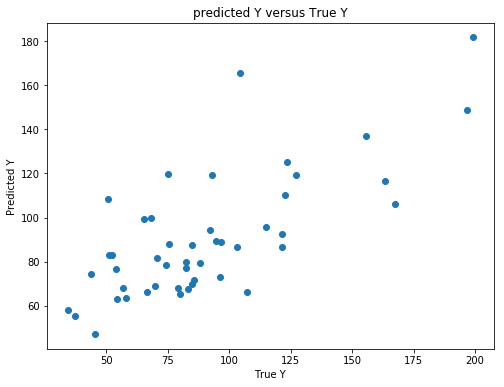

In [46]:
plt.scatter(plot_data['Y'], plot_data['q1_multivar_reg_ypred'])
#visualize 
plt.title('predicted Y versus True Y')
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.draw()

### Q5. Run cross-validation with the regressors in Q3, report the Out-of-sample R2 (OS R2)
    1. Put 50% observations on average into training set and the remaining into test set
    2. Run it 1000 times, obtain the average value

In [47]:
#In the sample test
OLS_R_2_IS=[] # make a list to store our in the sample R_squared
OLS_R_2_OS=[] #make a list to store our out the sample R_squared

for i in range(1000): 
    train, test = train_test_split(data, test_size=0.5)
    model = smf.ols(formula='Y~%s' % '+'.join(cols_of_inst), data=train).fit()
    
    # in sample Rsquared from the model
    OLS_R_2_IS.append(model.rsquared)
    
    # get prediction values for Y-hat
    Ypred = model.predict(test[cols_of_inst])
    R_OS=1-((np.asarray(Ypred)-test['Y'])**2).sum()/((test['Y']-np.mean(test['Y']))**2).sum()
    if R_OS<0: #cut negative values
        R_OS=0
    OLS_R_2_OS.append(R_OS)


OLS_R_2_IS=np.asarray(OLS_R_2_IS) # make a list to store our in the sample R_squared
OLS_R_2_OS=np.asarray(OLS_R_2_OS) # make a list to store our in the sample R_squared

print('Average IS R-squared: %f.4+-%f.4' % (OLS_R_2_IS.mean(), OLS_R_2_IS.std()))
print('Average OS R-squared: %f.4+-%f.4' % (OLS_R_2_OS.mean(), OLS_R_2_OS.std()))

Average IS R-squared: 0.598896.4+-0.141696.4
Average OS R-squared: 0.198162.4+-0.176078.4


### Q6. Apply regularization
Try Ridge regression for the regularization parameter $\alpha=e^{-5,-4...,9,10}$. For each value of $\alpha$ perform cross-validation with 1000 iterations of 50-50 split and report the average out-of-sample R2. Make sure to standardize the regressors first (this is essential for regularization to have regressors on the same scale).

In [48]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y,q1_multivar_reg_ypred
0,151,1,91,58,56,510,950,33,108,41,394,261,79.1,67.882209
1,143,0,113,103,95,583,1012,13,96,36,557,194,163.5,116.703293
2,142,1,89,45,44,533,969,18,94,33,318,250,57.8,63.743197
3,136,0,121,149,141,577,994,157,102,39,673,167,196.9,148.788244
4,141,0,121,109,101,591,985,18,91,20,578,174,123.4,125.278681


In [49]:
## standardization
scaler = preprocessing.StandardScaler().fit(data)
data_stdz = scaler.transform(data)  
data_stdz.mean(), data_stdz.std() 

(3.71199187564642e-17, 1.0)

#### above shows that data is standardized for sure

In [50]:
data_stdz = pd.DataFrame(data_stdz, columns=data.columns)
data_stdz.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y,q1_multivar_reg_ypred
0,0.999382,1.391941,-1.322656,-0.918333,-0.876069,-1.280441,-1.132720,-0.096034,0.702621,0.840356,-1.376330,1.697520,-0.298163,-0.808941
1,0.355944,-0.718421,0.665173,0.612222,0.533794,0.545491,0.994049,-0.627045,0.029823,0.241921,0.331211,0.000000,1.907645,0.936522
2,0.275515,1.391941,-1.503368,-1.360493,-1.309873,-0.705147,-0.480968,-0.494292,-0.082310,-0.117141,-2.172484,1.418822,-0.854843,-0.956919
3,-0.207064,-0.718421,1.388020,2.176788,2.196710,0.395415,0.376600,3.196235,0.366222,0.600982,1.546393,-0.684075,2.780560,2.083630
4,0.195085,-0.718421,1.388020,0.816296,0.750696,0.745593,0.067876,-0.494292,-0.250510,-1.673072,0.551201,-0.506722,0.859625,1.243111


In [51]:
#In the sample test
R_2_IS_Ridge=[] # make a list to store our in the sample R_squared
R_2_OS_Ridge=[] #make a list to store our out the sample R_squared

for i in range(-9, 11): 
    # my euler's no.
    _e = np.exp(i)
    print('e^%d value: %f.4' % (i, _e))
    # we are using standardized data set
    train, test = train_test_split(data_stdz, test_size=0.5) 
    # my data subsets
    X_train = train[cols_of_inst]
    Y_train = train['Y']
    X_test = test[cols_of_inst]
    Y_test = test['Y']
    # fit to model
    Ridge = linear_model.Ridge(fit_intercept=True,alpha=_e) #try Ridge with a selected regularization parameter lambda
    Ridge.fit(X_train, Y_train)
    
    p_OS=Ridge.predict(X_test)
    err_OS=p_OS-Y_test
    R_2_OS_Ridge.append(1- np.var(err_OS)/np.var(Y_test))

R_2_OS_Ridge = np.asarray(R_2_OS_Ridge)    
print(R_2_OS_Ridge)
print(R_2_OS_Ridge.max())
print('optimal alpha: e^%d' % list(range(-9, 11))[np.where(R_2_OS_Ridge == R_2_OS_Ridge.max())[0][0]])

e^-9 value: 0.000123.4
e^-8 value: 0.000335.4
e^-7 value: 0.000912.4
e^-6 value: 0.002479.4
e^-5 value: 0.006738.4
e^-4 value: 0.018316.4
e^-3 value: 0.049787.4
e^-2 value: 0.135335.4
e^-1 value: 0.367879.4
e^0 value: 1.000000.4
e^1 value: 2.718282.4
e^2 value: 7.389056.4
e^3 value: 20.085537.4
e^4 value: 54.598150.4
e^5 value: 148.413159.4
e^6 value: 403.428793.4
e^7 value: 1096.633158.4
e^8 value: 2980.957987.4
e^9 value: 8103.083928.4
e^10 value: 22026.465795.4
[ 0.6007335   0.51229911  0.46705562  0.26851872  0.31777062 -0.2428461
  0.07116599  0.43318816  0.47033679  0.412532    0.44762121  0.34943663
  0.35959791  0.30296122  0.2715752   0.07848444  0.04856956  0.01868444
  0.00829652  0.00243433]
0.6007335036599014
optimal alpha: e^-9


$R^2$ is improved to 0.573 when alpha value of $e^1$ is used

## Case II. Cluster the countries of the world by socio-economic profiles


## standardize the variables!!!!!!!

This dataset contains various socio-economic statistics of the world countries like 'Population', 'Area_sqmi', 'Birthrate', 'Deathrate', 'GDP_percapita' etc. The aim of this exercise is to discover clusters of the countries of similar socio-economic profile and find the outliers

In [52]:
# Importing the countries dataset and shapefile
world = gpd.read_file('DATA/World_Countries/World_Countries.shp')
countries = pd.read_csv("DATA/countries.csv")
countries.head()

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [53]:
__Q2_INIT_DATA__ = deepcopy(countries)

In [54]:
# run when countries is corrupt
countries = deepcopy(__Q2_INIT_DATA__)

In [55]:
world.head()

,COUNTRY,geometry
0,Aruba (Netherlands),POLYGON ((-69.88223266601562 12.41110992431641...
1,Antigua and Barbuda,(POLYGON ((-61.7388916015625 17.54055404663086...
2,Afghanistan,"POLYGON ((61.27655792236328 35.60724639892578,..."
3,Algeria,POLYGON ((-5.152134895324707 30.18046951293945...
4,Azerbaijan,(POLYGON ((46.54037475585938 38.87558746337891...


In [56]:
world[world['COUNTRY'].str.contains('Congo')]

,COUNTRY,geometry
39,Congo,POLYGON ((15.89050483703613 -3.943009376525879...
40,Democratic Republic of the Congo,POLYGON ((16.10007095336914 -5.859373092651367...


In [57]:
countries[countries['COUNTRY'].str.contains('Congo')]

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
45,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,62660551,2345410,26.7,0.00,0.00,94.69,700.0,65.5,0.2,2.96,0.52,96.52,2.0,43.69,13.27,0.550,0.11,0.340
46,"Congo, Repub. of the",SUB-SAHARAN AFRICA,3702314,342000,10.8,0.05,-0.17,93.86,700.0,83.8,3.7,0.51,0.13,99.36,2.0,42.57,12.93,0.062,0.57,0.369


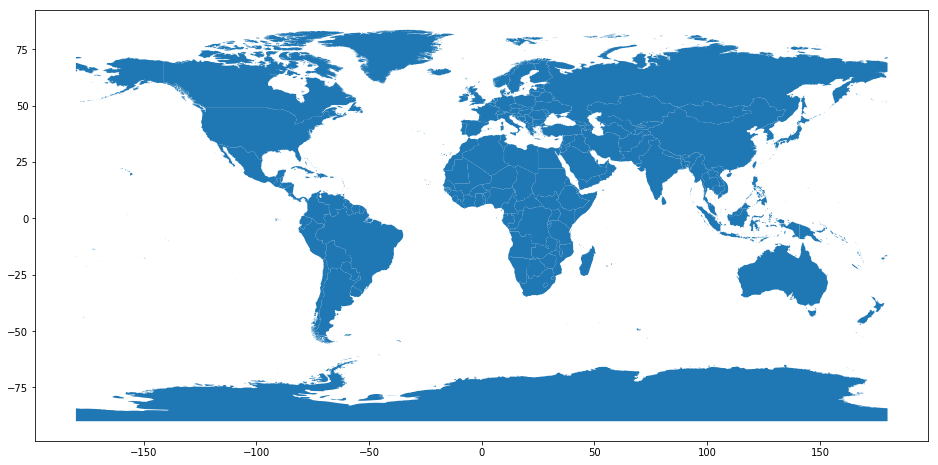

In [58]:
world.plot(figsize=(16, 12))

### Q1. Cleaning: Clean the column 'COUNTRY' and deal with missing values
    1. Remove white-spaces from the data in column 'COUNTRY'
    2. Fill all missing values in dataset with 0
    3. Standardize the features (all columns other than County and Region; since the clusters use Euclidean distance, bringing features on the same scale is important (e.g. GDP and Climate are fully incomparable;  it is the best practice to standardise the features before using KMeans in such a case)

#### 1. Remove white-spaces from the data in column 'COUNTRY'

In [59]:
del_ws = lambda s: s.strip()
countries['COUNTRY'] = countries['COUNTRY'].apply(del_ws)

#### 2. Fill all missing values in dataset with 0

In [60]:
countries.fillna(0, inplace=True)
countries.replace('', 0, inplace=True)
countries.head()

,COUNTRY,Region,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


#### 3. Standardize the features (all columns other than County and Region; since the clusters use Euclidean distance, bringing features on the same scale is important (e.g. GDP and Climate are fully incomparable;  it is the best practice to standardise the features before using KMeans in such a case)

In [61]:
q2_dta_cols = [c for c in countries if c not in ['COUNTRY', 'Region']]
q2_dta_stdz = countries[q2_dta_cols]
q2_dta_stdz.head()

,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


In [62]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(q2_dta_stdz)
q2_dta_stdz=scaler.transform(q2_dta_stdz)  
q2_dta_stdz = pd.DataFrame(q2_dta_stdz, columns=q2_dta_cols)
q2_dta_stdz.head()

,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.019695,0.027583,-0.199844,-0.293443,4.750798,3.625919,-0.892453,-1.375264,-1.004858,-0.118725,-0.517497,0.379075,-1.016557,2.180731,2.215806,1.633281,-0.150484,-0.695151
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025097,-0.382826,-0.513413,0.349383,-0.706083,0.569556,-0.012506,-0.362070,1.165556,-0.590781,-0.759197,0.622399,-0.493931,0.239991
2,0.035618,0.998421,-0.220490,-0.292889,-0.088242,-0.114349,-0.363792,-0.214116,-0.675766,-0.803164,-0.513890,0.879178,-1.016557,-0.412115,-0.879220,-0.272369,2.227228,-1.080486
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281389,-0.729751,-0.164297,0.707973,0.121260,-0.282345,1.259591,-0.333348,0.074499,0.056111,-1.142878,-0.962228,-1.735624,-2.480848
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354184,-0.877583,0.932923,0.810427,1.165654,-0.879981,-0.543949,0.949576,1.165556,-1.154060,-0.556534,-0.962228,-1.735624,-2.480848


### Q2. Clusters the countries using KMeans and Gausian Mixture model (K=2,3 clusters). 
Visualize the results:
    1. Merge the newly formed dataframe with 'world' shapefile on the attribute 'COUNTRY'
    2. Visualize on a world map using world.plot()
    3. Encode the clusters with different colors

### Pt 1-1. Clustering with Kmeans

In [63]:
#train the model
KM = [KMeans(n_clusters=k).fit(q2_dta_stdz) for k in range(2, 4)]

### Pt 1-2. Clustering with Gaussian Mixture

In [64]:
#train Gaussian Mixture (as per above we should not even try k-means for such a case)
GM = []
for n in range(2, 4):
    res1=GaussianMixture(n_components=n,random_state=324).fit(q2_dta_stdz)
    GM.append(res1.predict(q2_dta_stdz))

### Pt1. Visualization

In [65]:
### get country and region again
q2_dta_gdp = q2_dta_stdz.merge(countries[['COUNTRY', 'Region']], left_index=True, right_index=True)
q2_dta_gdp.head()

,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,COUNTRY,Region
0,0.019695,0.027583,-0.199844,-0.293443,4.750798,3.625919,-0.892453,-1.375264,-1.004858,-0.118725,-0.517497,0.379075,-1.016557,2.180731,2.215806,1.633281,-0.150484,-0.695151,Afghanistan,ASIA (EX. NEAR EAST)
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025097,-0.382826,-0.513413,0.349383,-0.706083,0.569556,-0.012506,-0.362070,1.165556,-0.590781,-0.759197,0.622399,-0.493931,0.239991,Albania,EASTERN EUROPE
2,0.035618,0.998421,-0.220490,-0.292889,-0.088242,-0.114349,-0.363792,-0.214116,-0.675766,-0.803164,-0.513890,0.879178,-1.016557,-0.412115,-0.879220,-0.272369,2.227228,-1.080486,Algeria,NORTHERN AFRICA
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281389,-0.729751,-0.164297,0.707973,0.121260,-0.282345,1.259591,-0.333348,0.074499,0.056111,-1.142878,-0.962228,-1.735624,-2.480848,American Samoa,OCEANIA
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354184,-0.877583,0.932923,0.810427,1.165654,-0.879981,-0.543949,0.949576,1.165556,-1.154060,-0.556534,-0.962228,-1.735624,-2.480848,Andorra,WESTERN EUROPE


In [66]:
q2_dta_gdp = world.merge(q2_dta_gdp, left_on='COUNTRY', right_on='COUNTRY')
q2_dta_gdp.head()

,COUNTRY,geometry,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region
0,Afghanistan,"POLYGON ((61.27655792236328 35.60724639892578,...",0.019695,0.027583,-0.199844,-0.293443,4.750798,3.625919,-0.892453,-1.375264,...,-0.118725,-0.517497,0.379075,-1.016557,2.180731,2.215806,1.633281,-0.150484,-0.695151,ASIA (EX. NEAR EAST)
1,Algeria,POLYGON ((-5.152134895324707 30.18046951293945...,0.035618,0.998421,-0.220490,-0.292889,-0.088242,-0.114349,-0.363792,-0.214116,...,-0.803164,-0.513890,0.879178,-1.016557,-0.412115,-0.879220,-0.272369,2.227228,-1.080486,NORTHERN AFRICA
2,Azerbaijan,(POLYGON ((46.54037475585938 38.87558746337891...,-0.176642,-0.286412,-0.173343,-0.293443,-1.018906,1.322625,-0.623135,0.707973,...,0.457403,-0.218109,-0.183542,-1.016557,-0.095271,0.132124,0.000843,1.282748,-0.591768,C.W. OF IND. STATES
3,Albania,"POLYGON ((20.79192352294922 40.43154144287109,...",-0.213877,-0.318797,-0.153603,-0.275974,-1.025097,-0.382826,-0.513413,0.349383,...,0.569556,-0.012506,-0.362070,1.165556,-0.590781,-0.759197,0.622399,-0.493931,0.239991,EASTERN EUROPE
4,Armenia,(POLYGON ((46.54037475585938 38.87558746337891...,-0.219022,-0.318209,-0.168514,-0.293443,-1.342884,-0.332982,-0.613160,0.762615,...,0.297624,-0.267406,-0.043310,2.256612,-0.858338,-0.166951,0.670211,0.529806,-0.516581,C.W. OF IND. STATES


### Kmeans Viz

#### k = 2

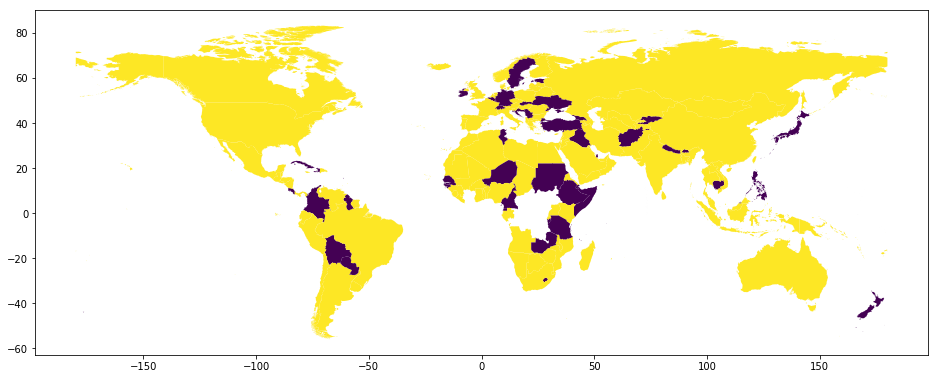

In [67]:
q2_dta_gdp['kmean2'] = pd.Series(KM[0].labels_)
q2_dta_gdp.plot(column='kmean2', figsize=(16, 12))

#### k = 3

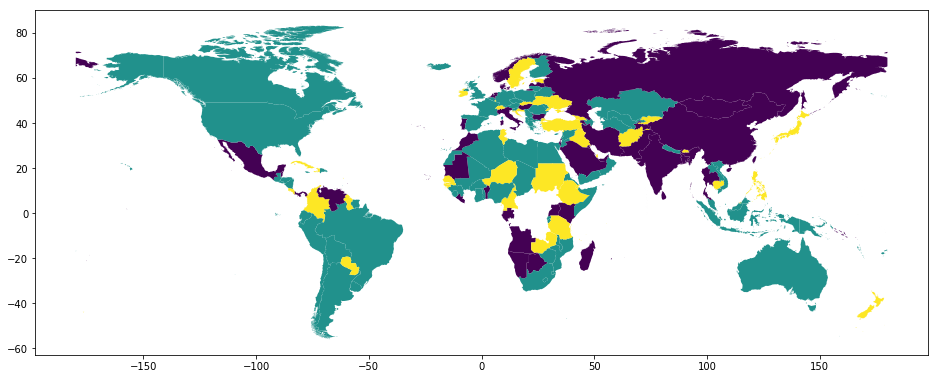

In [68]:
q2_dta_gdp['kmean3'] = pd.Series(KM[1].labels_)
q2_dta_gdp.plot(column='kmean3', figsize=(16, 12))

### Gaussian Mixture Viz

#### k = 2

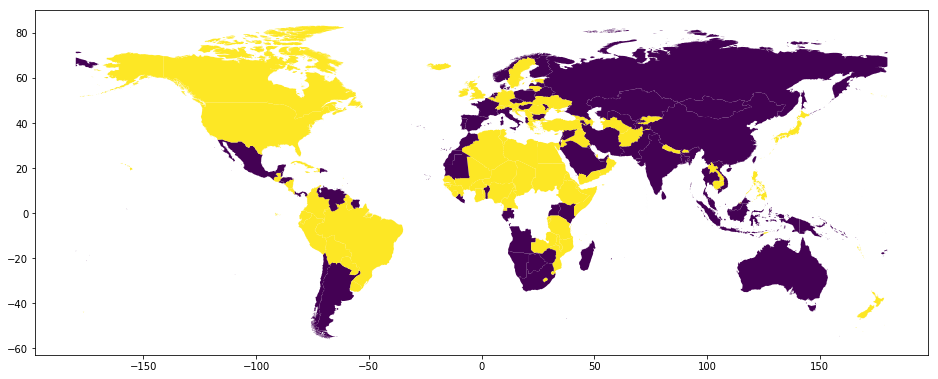

In [69]:
q2_dta_gdp['gm2'] = pd.Series(GM[0])
q2_dta_gdp.plot(column='gm2', figsize=(16, 12))

#### k = 3

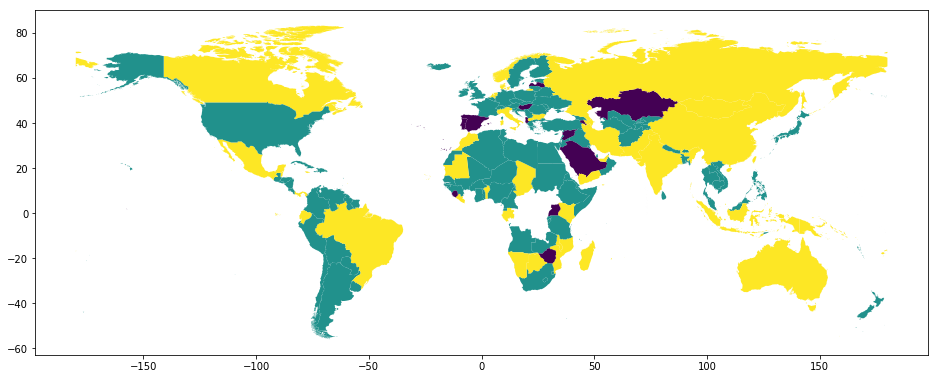

In [70]:
q2_dta_gdp['gm3'] = pd.Series(GM[1])
q2_dta_gdp.plot(column='gm3', figsize=(16, 12))

### Q3. Use average silhuette to find the best number of clusters for K-means and Gausian Mixture (try K=2,3...,10).

In [71]:
q2_dta_stdz.head()

,Population,Area_sqmi,Pop_Density,Coastline_area_ratio,Net_migration,InfantMortality_per1000,GDP_percapita,Literacy_percent,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.019695,0.027583,-0.199844,-0.293443,4.750798,3.625919,-0.892453,-1.375264,-1.004858,-0.118725,-0.517497,0.379075,-1.016557,2.180731,2.215806,1.633281,-0.150484,-0.695151
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025097,-0.382826,-0.513413,0.349383,-0.706083,0.569556,-0.012506,-0.362070,1.165556,-0.590781,-0.759197,0.622399,-0.493931,0.239991
2,0.035618,0.998421,-0.220490,-0.292889,-0.088242,-0.114349,-0.363792,-0.214116,-0.675766,-0.803164,-0.513890,0.879178,-1.016557,-0.412115,-0.879220,-0.272369,2.227228,-1.080486
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281389,-0.729751,-0.164297,0.707973,0.121260,-0.282345,1.259591,-0.333348,0.074499,0.056111,-1.142878,-0.962228,-1.735624,-2.480848
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354184,-0.877583,0.932923,0.810427,1.165654,-0.879981,-0.543949,0.949576,1.165556,-1.154060,-0.556534,-0.962228,-1.735624,-2.480848


In [72]:
import matplotlib.cm as cm

range_n_clusters = range(2, 11)

KM_silhouette_avg = []
GM_silhouette_avg = []
for n_clusters in range_n_clusters:
    # train KM
    km = KMeans(n_clusters=n_clusters)
    km_labels = km.fit_predict(q2_dta_stdz)
    KM_silhouette_avg.append(silhouette_score(q2_dta_stdz, km_labels))
    #train Gaussian Mixture
    gm_labels = GaussianMixture(n_components=n_clusters).fit(q2_dta_stdz).predict(q2_dta_stdz)
    GM_silhouette_avg.append(silhouette_score(q2_dta_stdz, gm_labels))


KM_silhouette_avg = np.asarray(KM_silhouette_avg)
print(KM_silhouette_avg)
GM_silhouette_avg = np.asarray(GM_silhouette_avg)
print(GM_silhouette_avg)

#report average Silhouette score
print('The Maximum Silhouette score for K-Means Clustering is %f and the best number of clusters is %d' % (KM_silhouette_avg.max(), list(range(2, 11))[np.where(KM_silhouette_avg == KM_silhouette_avg.max())[0][0]]))
print('The Maximum Silhouette score for Gaussian Mix. Clustering is %f and the best number of clusters is %d' % (GM_silhouette_avg.max(), list(range(2, 11))[np.where(GM_silhouette_avg == GM_silhouette_avg.max())[0][0]]))

[0.18828198 0.15558478 0.15694027 0.14027564 0.16681284 0.16266315
 0.16995206 0.14751647 0.1596835 ]
[0.22557294 0.19796625 0.11693374 0.13820091 0.12702026 0.07867219
 0.09401082 0.11368576 0.14851426]
The Maximum Silhouette score for K-Means Clustering is 0.188282 and the best number of clusters is 2
The Maximum Silhouette score for Gaussian Mix. Clustering is 0.225573 and the best number of clusters is 2


### Q.4  Transform all features using PCA into 2 principal components and visualize on a scatter plot
Annotate the data points which appear as outliers

In [73]:
pca = PCA(2)
P = pca.fit_transform(q2_dta_stdz)
p_df = pd.DataFrame(P, index=q2_dta_stdz.index)
p_df['COUNTRY'] = q2_dta_gdp['COUNTRY']
p_df.head()

,0,1,COUNTRY
0,4.516154,-2.686813,Afghanistan
1,-0.071538,1.448299,Algeria
2,0.461666,-1.504275,Azerbaijan
3,-0.183318,2.367115,Albania
4,-1.974680,-1.525659,Armenia


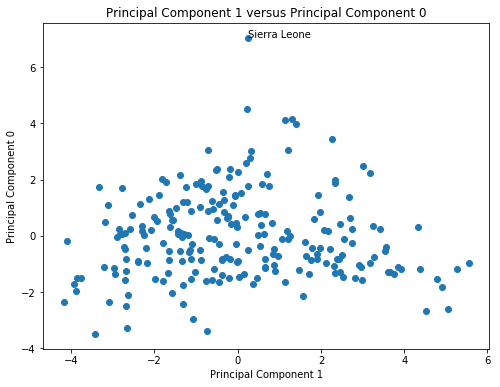

Sierra Leone is the most notable outlier that is furthest away from the cloud of data points


In [74]:
plt.scatter(p_df.iloc[:, 0], p_df.iloc[:, 1], )
for c in p_df['COUNTRY']:
    if c == 'Sierra Leone':
        plt.annotate(c, xy=tuple(p_df[p_df['COUNTRY'] == c][[0, 1]].values[0]))
#visualize 
plt.title('Principal Component 1 versus Principal Component 0')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 0')
plt.show()
print('Sierra Leone is the most notable outlier that is furthest away from the cloud of data points')

#  Part III. Reconstructing faces using PCA

This dataset is made up of images containing faces of celebrities and world leaders. Since an image is a 2-D array (eg - 62 x 47 pixels) where each pixel is a feature, there will be large number of features (eg - 2914 features) making it difficult for the model to train quickly and predict accurately. In such cases, PCA comes to the rescue where the Principal components can capture large amount of information without using too many features. This can come in handy while building models for CCTV surveillance, pedestrian counting, public safety etc. 
<br><br>
Total images : 1288<br>
Image size : 62 x 47<br>
Total features : 2914<br><br>
To make it easy to use, the image has been flattened to a 1-D array containing all the features (or pixels). All computations can be done on the flattened image but only for displaying the image, it has to be reshaped to the original dimensions (height, width)

## Loading and viewing dataset

Totoal images: 1288
Totoal features: 2914

Height: 62 
Width: 47


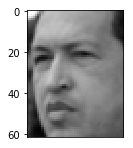

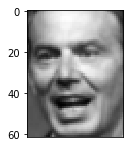

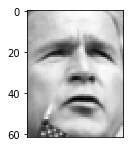

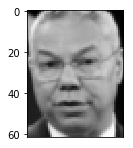

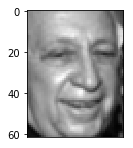

In [75]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70)
n_samples, height, width = lfw_people.images.shape
npix = height*width
fea = lfw_people.data

print ("Totoal images:", len(fea))
print ("Totoal features:", npix)
print ("\nHeight:", height, "\nWidth:", width)

def plt_face(x):
    #print "Inside plt_face()"
    #global h,w
    plt.imshow(x.reshape((height, width)), cmap=plt.cm.gray)
    plt.xticks([])
    
n = 5
for i in range(n):
    plt.figure(figsize=(10, 20))
    plt.subplot(1,n,i+1)
    plt_face(fea[i])
    plt.show()

## Helper Functions

*** 1/3 Computes the Mean of all images, returns it as 'M' ***

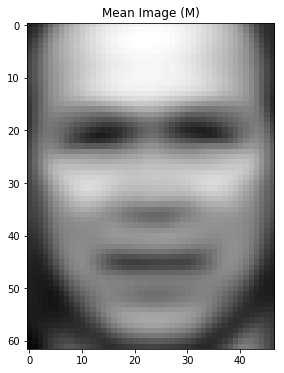

In [76]:
def mean_image(fea):
    """Computes mean for each pixel in the image frame
    
    Parameters:
        fea : Feature vector containing of all images
    
    Returns:
        new_img : Mean Image
    """
    rows, cols = fea.shape
    new_img = np.zeros(cols)
    for i in range(cols):
        mean = fea[:,i].mean()
        new_img[i] = mean
        
    return new_img

M = mean_image(fea)

plt.title ("Mean Image (M)")
plt.imshow(M.reshape(height, width), cmap = 'gray')

*** 2/3 Displays the image from Principal components ***

Reconstructing original image using equation : $ \bf{X = W^T \cdot Z + M} $

In [77]:
def display_image_from_pca(Z, pca, fea, image_no=4):
    """Display an image from the Transformed data, PCA model and features along with the original image
    
    Parameters:
        Z : Transormed data after using PCA
        pca : PCA model used to transform the data
        fea : All images
        image_no : Image no. to be displayed
    
    Returns:
        Displays the reconstructed image and original image
        
    The columns of W are the eigenvectors of the covariance matrix of X
    The columns of Z correspond to attributes associated with largest eigen value
    """
    # Fetching eigenvectors and the transformed data
    W = pca.components_     
    # Applying reconstruction equation on the values obtained
    X = ( W.transpose().dot(Z[image_no]) + mean_image(fea) ).reshape( (height,width) )
    
    # Displaying the images
    plt.subplot(1, 2, 1)
    plt.title("Reconstructed Image")
    plt.imshow(X, cmap = 'gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Original Image")
    plt.imshow(fea[image_no].reshape(height, width), cmap = 'gray')
    plt.show()

*** 3/3 Makes dataframe containing images, names and target_no for simplicity of use afterwards ***

In [78]:
target_names = lfw_people.target_names
#true_names = []
ls = []
for i in range(len(fea)):
    target_no = lfw_people.target[i]
    true_name = target_names[target_no].rsplit(' ', 1)[-1]
    ls.append([fea[i], true_name, target_no])
    
df = pd.DataFrame(ls, columns=['Image', 'True_Name', 'Target_Number'])
df.head()

,Image,True_Name,Target_Number
0,"[253.66667, 254.33333, 253.66667, 250.66667, 2...",Chavez,5
1,"[38.333332, 43.0, 53.0, 41.0, 51.0, 89.0, 113....",Blair,6
2,"[88.0, 92.666664, 112.666664, 129.0, 141.33333...",Bush,3
3,"[13.333333, 7.3333335, 6.3333335, 7.6666665, 5...",Powell,1
4,"[123.666664, 121.0, 123.0, 129.0, 130.33333, 1...",Sharon,0


In [79]:
df.shape

(1288, 3)

### Q1. Fit a PCA model and return the transformed data
    Hint: Use numpy array - 'fea' (contains feature vector of all the images) for fitting PCA model

In [80]:
fea.shape

(1288, 2914)

In [81]:
# standardize my data
scaler = preprocessing.StandardScaler().fit(fea)
fea_s = scaler.transform(fea)  
fea_s

array([[ 3.423937  ,  3.4668899 ,  3.42595   , ..., -0.3870429 ,
        -0.290041  , -0.22501387],
       [-1.1351109 , -1.1341733 , -1.0817318 , ..., -0.03435917,
         0.07557166,  0.49733528],
       [-0.08356572, -0.05285083,  0.25859213, ...,  0.83247817,
         0.9300852 ,  0.9915741 ],
       ...,
       [-0.11885241, -0.25605226, -0.5575827 , ..., -0.88419956,
        -0.78744435, -0.8079622 ],
       [-0.9022183 , -0.8583997 , -0.55009496, ...,  0.8792193 ,
         0.8365562 ,  0.7169969 ],
       [-1.2903725 , -1.497033  , -1.64332   , ..., -1.062666  ,
        -0.87672186, -0.44045132]], dtype=float32)

In [82]:
pca = PCA(0.8) # get 80% of explanatory power
P = pca.fit_transform(fea_s)
pdf = pd.DataFrame(P, index=df.index)
pdf.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,3.762230,8.243347,3.894268,-2.286413,-10.871223,-4.662893,14.737627,-4.642365,3.563006,-1.772875,...,-0.537790,2.370247,1.090363,-0.928526,-2.964870,1.190531,3.762465,2.107674,0.125921,-1.971129
1,16.808603,-15.407866,-13.797769,-20.054932,-2.436918,15.577283,22.223465,9.385966,-5.154223,-7.374185,...,0.222726,2.112593,1.188880,-1.290150,-1.763357,3.928259,-2.787723,1.361476,1.307183,-0.038940
2,-17.401480,-6.707966,1.465417,15.990421,2.323340,22.210009,-6.814123,-6.090403,-8.280760,4.786047,...,3.552708,-2.408831,2.551316,4.744223,-5.588576,-5.236065,-2.272809,4.251652,-2.470957,-6.447586
3,6.956769,-5.959771,-0.266210,-1.933365,-5.423515,-18.195267,5.288272,-15.980331,11.098503,-2.940763,...,-3.400347,-8.389340,-8.938894,5.313888,2.273236,-9.436989,2.317642,-0.945944,1.542219,8.980804
4,13.282413,19.976444,7.335030,-12.140080,9.396275,-3.766971,-5.022610,1.173188,3.903945,-1.813748,...,-2.670161,4.389110,2.828433,-1.396661,-4.032142,-1.745996,-9.043744,-1.409258,-4.963769,-2.989991


### we need 33 features to explain 80% of total data

### Q2. Visualize all the images in the space of the first two Principal components
    Make a scatter plot, where images are represented as dots

In [83]:
pca = PCA(2) # get 2 leading PC
P = pca.fit_transform(fea_s)
p2_df = pd.DataFrame(P, index=df.index)
p2_df.head()

,0,1
0,3.762386,8.243821
1,16.808525,-15.407786
2,-17.401417,-6.708210
3,6.956769,-5.959703
4,13.282421,19.976458


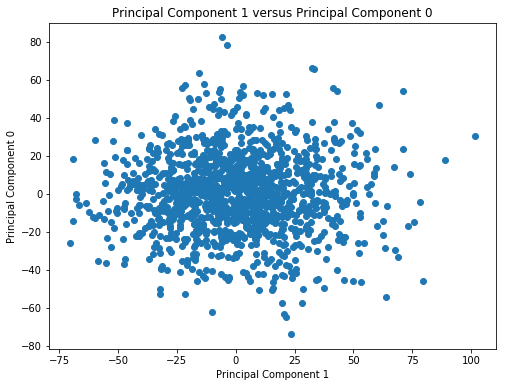

The result is a perfect cloud


In [84]:
plt.scatter(p2_df.iloc[:, 0], p2_df.iloc[:, 1], )
#visualize 
plt.title('Principal Component 1 versus Principal Component 0')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 0')
plt.show()
print('The result is a perfect cloud')

### Q3. Visualize Bush vs Powell in the space of 1st and 6th components

In [85]:
pca = PCA(6) # get 2 leading PC
P = pca.fit_transform(fea_s)
p6_df = pd.DataFrame(P, index=df.index)
p6_df.head()

,0,1,2,3,4,5
0,3.762379,8.243836,3.894530,-2.286110,-10.872515,-4.659017
1,16.808517,-15.407859,-13.797492,-20.054901,-2.436996,15.576396
2,-17.401415,-6.708212,1.465422,15.990373,2.322800,22.212154
3,6.956771,-5.959704,-0.266301,-1.933495,-5.421678,-18.198597
4,13.282420,19.976460,7.335134,-12.139978,9.395782,-3.765855


In [86]:
p6_df['Name'] = df['True_Name']

In [87]:
p6_df.head()

,0,1,2,3,4,5,Name
0,3.762379,8.243836,3.894530,-2.286110,-10.872515,-4.659017,Chavez
1,16.808517,-15.407859,-13.797492,-20.054901,-2.436996,15.576396,Blair
2,-17.401415,-6.708212,1.465422,15.990373,2.322800,22.212154,Bush
3,6.956771,-5.959704,-0.266301,-1.933495,-5.421678,-18.198597,Powell
4,13.282420,19.976460,7.335134,-12.139978,9.395782,-3.765855,Sharon


In [88]:
p6_df_bush = p6_df[p6_df['Name'] == 'Bush']
p6_df_powell = p6_df[p6_df['Name'] == 'Powell']

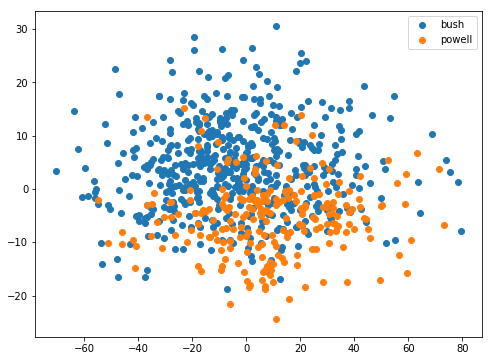

In [89]:
plt.scatter(p6_df_bush.iloc[:, 0], p6_df_bush.iloc[:, 5], label='bush')
plt.scatter(p6_df_powell.iloc[:, 0], p6_df_powell.iloc[:, 5], label='powell')
plt.legend()

### Q4.  Reconstructing original image

Display any reconstructed image by passing the PCA model, transformed data, images and a particular image_no to 'display_image_from_pca' function which will display the reconstructed and original image side-by-side in the same plot. Use first 6, 50 and 200 components

### 6 components

In [90]:
pca = PCA(6) # get 6 leading PC
P = pca.fit_transform(fea)
p6_df = pd.DataFrame(P, index=df.index)
p6_df.head()

,0,1,2,3,4,5
0,115.533432,117.679726,283.481750,-49.669739,-377.578156,-59.036835
1,809.995972,-624.858704,365.076294,-91.267464,302.495880,268.332001
2,-612.856934,-243.098145,-470.889160,-94.956604,-105.684509,835.347107
3,202.542297,-261.477600,418.973663,-29.397467,39.787701,-616.542969
4,547.915833,811.659851,592.579834,268.084167,171.356506,-17.465408


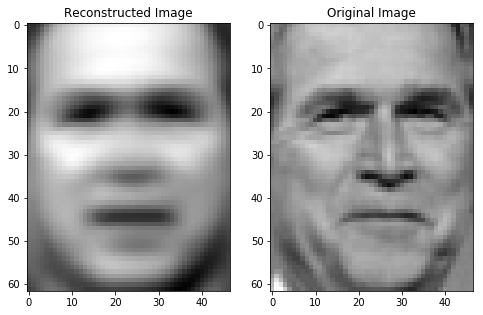

In [91]:
display_image_from_pca(P, pca, fea, image_no=99)

### 50 components

In [92]:
pca = PCA(50) # get 50 leading PC
P = pca.fit_transform(fea)
p50_df = pd.DataFrame(P, index=df.index)
p50_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,115.533470,117.679344,283.481384,-49.669399,-377.577545,-59.041382,92.452507,2.930903,-505.243195,-102.715202,...,-223.877106,-48.380775,-7.679921,14.443818,117.488022,-67.509766,112.657700,-53.955212,2.899680,29.268795
1,809.996277,-624.859741,365.076111,-91.267876,302.496735,268.310608,930.204346,-486.345978,-1.693854,-87.780731,...,-20.156105,-145.723877,-58.496140,-91.318619,-51.328018,-133.593018,-42.687500,77.488617,-216.094254,106.918449
2,-612.856262,-243.098160,-470.890320,-94.957901,-105.682709,835.377869,-184.255234,-147.400833,228.011841,411.663513,...,-167.270416,66.168846,96.850578,-61.157543,-43.340809,-59.526245,79.772247,-66.303680,171.433472,-169.493149
3,202.542191,-261.477203,418.973206,-29.397776,39.785194,-616.437744,-318.065491,7.356988,-537.828003,77.624443,...,104.285027,193.844467,52.262581,-1.541406,54.286373,-98.162033,219.300705,-50.445187,-76.491943,-106.261383
4,547.914917,811.659241,592.578918,268.084473,171.356628,-17.501694,-125.163033,117.162125,-114.451767,-302.883698,...,-104.024414,-197.505569,118.118652,130.426544,37.325932,-174.048218,62.250805,18.133860,-48.512436,3.929913


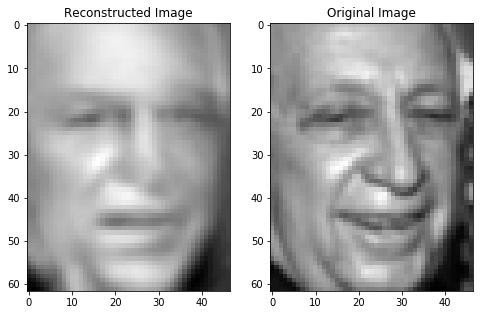

In [93]:
display_image_from_pca(P, pca, fea)

### 200 components

In [94]:
pca = PCA(200) # get 200 leading PC
P = pca.fit_transform(fea)
p200_df = pd.DataFrame(P, index=df.index)
p200_df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,115.533707,117.679214,283.481842,-49.671013,-377.577606,-59.041859,92.452003,2.939167,-505.242310,-102.715454,...,-20.975088,51.399212,21.144403,101.540077,-43.335335,-14.062088,25.804934,-0.403905,37.388912,-9.269145
1,809.995544,-624.854919,365.076599,-91.266708,302.497864,268.310638,930.203613,-486.349243,-1.702688,-87.780502,...,13.343394,8.710297,-31.975086,12.787034,28.029902,-21.450230,17.883335,28.760250,-21.255533,37.050510
2,-612.856628,-243.098663,-470.889282,-94.958130,-105.680611,835.381958,-184.254196,-147.400513,228.010864,411.664093,...,-15.093962,-22.875603,9.062147,-41.862839,9.288348,-84.913795,5.659794,27.040869,-12.033669,-0.172750
3,202.541946,-261.477142,418.974091,-29.397520,39.782448,-616.439087,-318.065948,7.368991,-537.825500,77.624962,...,2.357331,62.976997,50.380554,74.961472,-96.676109,-0.187871,-1.086353,41.137661,51.267601,17.803827
4,547.915283,811.660583,592.579285,268.084595,171.355408,-17.502338,-125.164230,117.162262,-114.452232,-302.883026,...,-15.915626,23.659039,25.071318,-24.619247,33.502899,-11.254220,-12.436901,10.389794,18.897484,8.480918


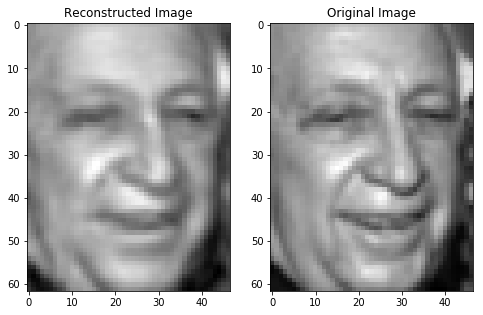

In [95]:
display_image_from_pca(P, pca, fea)

In [96]:
pca = PCA(2000) # get 200 leading PC
P = pca.fit_transform(fea_s)
p200_df = pd.DataFrame(P, index=df.index)
p200_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287
0,3.762230,8.243347,3.894268,-2.286413,-10.871223,-4.662893,14.737627,-4.642365,3.563006,-1.772875,...,0.003036,-0.035246,-0.037289,0.029305,0.006717,0.003845,0.009272,0.028621,-0.000463,0.000006
1,16.808603,-15.407866,-13.797769,-20.054932,-2.436918,15.577283,22.223465,9.385966,-5.154223,-7.374185,...,-0.037075,-0.041063,-0.007958,-0.015978,-0.029935,-0.028032,-0.058844,-0.004106,-0.041043,0.000006
2,-17.401480,-6.707966,1.465417,15.990421,2.323340,22.210009,-6.814123,-6.090403,-8.280760,4.786047,...,0.013133,0.008735,0.006244,-0.020246,0.006558,0.011815,-0.015246,0.019059,-0.010568,0.000006
3,6.956769,-5.959771,-0.266210,-1.933365,-5.423515,-18.195267,5.288272,-15.980331,11.098503,-2.940763,...,0.011658,-0.012799,-0.018026,0.004180,0.024649,-0.007680,-0.012053,0.012207,-0.006104,0.000006
4,13.282413,19.976444,7.335030,-12.140080,9.396275,-3.766971,-5.022610,1.173188,3.903945,-1.813748,...,-0.013694,-0.026350,-0.002950,0.005038,-0.024815,0.014631,0.018461,0.023019,0.001988,0.000006


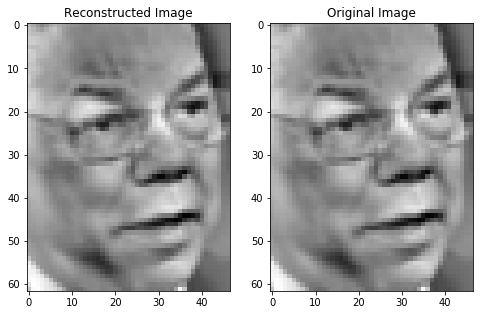

In [97]:
display_image_from_pca(P, pca, fea_s, image_no=845)